In [2]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 45.1 MB/s eta 0:00:00


In [10]:
import mysql.connector
import pandas as pd

# Database connection
conn = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team5",
    password="DM!$!Team!520@4!23&",
    database="project_profit_analysis"
)

# SQL query to fetch data
query = "SELECT * FROM startup"

# Load data into DataFrame
df = pd.read_sql(query, conn)

# View data
df.head()

/tmp/ipython-input-2751265642.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.to_csv("startup_profit_analysis.csv", index=False)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
df = pd.read_csv("startup_profit_analysis.csv")

In [30]:
print(df.columns.tolist())

['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']


In [31]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['rd_spend', 'administration', 'marketing_spend', 'state', 'profit']


In [32]:
df.rename(columns={
    'rd_spend': 'r_and_d_spend',
    'marketing_spend': 'marketing_spend',
    'administration': 'administration',
    'profit': 'profit',
    'state': 'state'
}, inplace=True)

In [33]:
print(df.columns.tolist())

['r_and_d_spend', 'administration', 'marketing_spend', 'state', 'profit']


In [34]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   r_and_d_spend    50 non-null     float64
 1   administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   state            50 non-null     object 
 4   profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,0
r_and_d_spend,0
administration,0
marketing_spend,0
state,0
profit,0


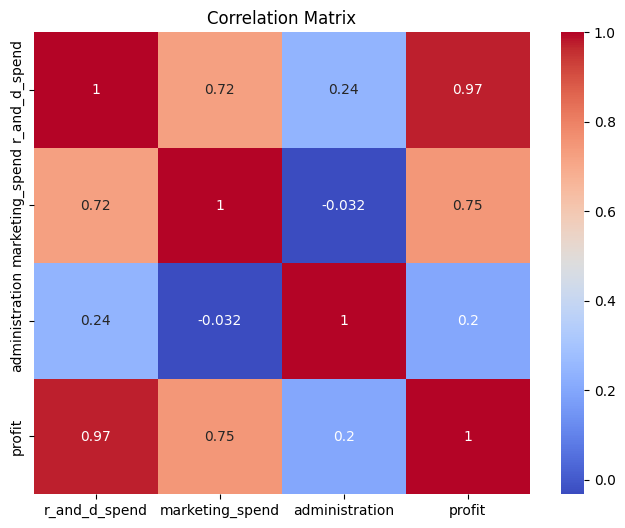

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['r_and_d_spend','marketing_spend','administration','profit']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

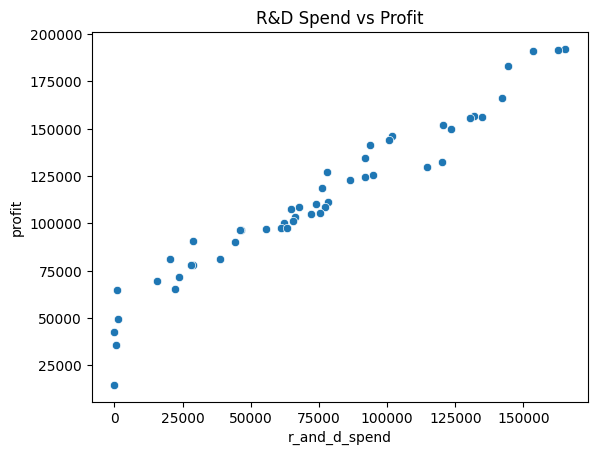

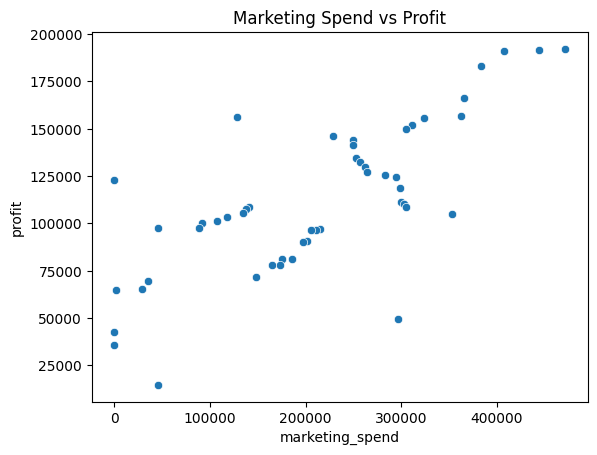

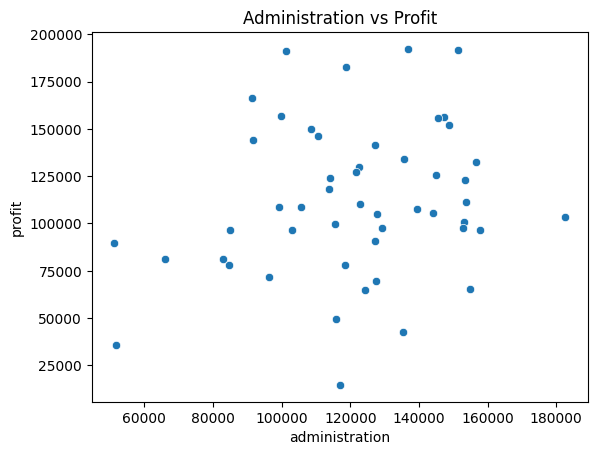

In [36]:
sns.scatterplot(x='r_and_d_spend', y='profit', data=df)
plt.title("R&D Spend vs Profit")
plt.show()

sns.scatterplot(x='marketing_spend', y='profit', data=df)
plt.title("Marketing Spend vs Profit")
plt.show()

sns.scatterplot(x='administration', y='profit', data=df)
plt.title("Administration vs Profit")
plt.show()


In [37]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)
df.head()

,r_and_d_spend,administration,marketing_spend,profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [38]:
X = df.drop('profit', axis=1)
y = df['profit']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8987266414328637
RMSE: 9055.957323458464


In [42]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
3,state_Florida,938.793006
4,state_New York,6.987760
0,r_and_d_spend,0.805630
2,marketing_spend,0.029855
1,administration,-0.068788


In [43]:
new_data = pd.DataFrame({
    'r_and_d_spend': [21892.92, 23940.93],
    'administration': [81910.77, 96489.63],
    'marketing_spend': [164270.7, 137001.1]
})

In [44]:
new_data = new_data.reindex(columns=X.columns, fill_value=0)

In [45]:
predicted_profit = model.predict(new_data)
predicted_profit

array([70935.54023188, 70768.48376693])